# TP 4 - Procesamiento de Imagenes
Grupo 4 <br>
Integrantes:
- Pablo Smolkin
- Pedro Carranza Vélez
- Philippe Dutriez Diaz
- Francisco Daniel Ledesma

Nota: Las funciones utilizadas se encuentran en el archivo functions.py

In [2]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
from common.functions import *

In [3]:
from functions import *

In [4]:
%load_ext autoreload
%autoreload 2

***
### 1. Dada la imagen *lena_gray.tif* se pide obtener:

* El negativo de la imagen.
* Una transformación tal que convierta los valores entre [0.25 0.5] al rango [0 1].

(Usar imadjust de Matlab pero implementarlo en Python)

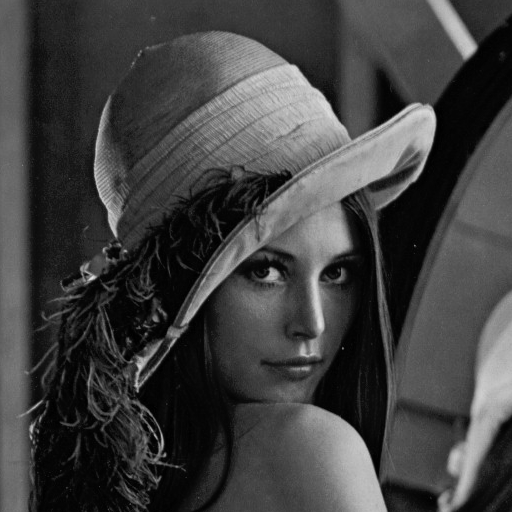

In [5]:
lena = Image.open('img/lena_gray.tif')
w, h = lena.size
displayImage(lena, w, h)

Negativo

$s = L - 1 - r$

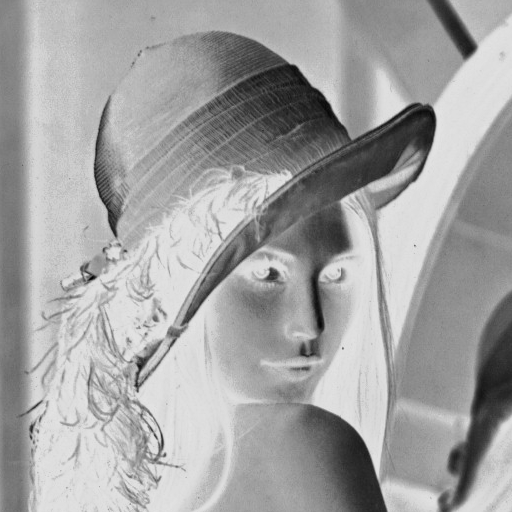

In [6]:
lena_arr = np.asarray(lena)
L = np.max(lena_arr) + 1    # Niveles de grises en la imagen
lena_neg = L - 1 - lena_arr     # Ecuación del negativo
displayImage(Image.fromarray(lena_neg), w, h)

[0.25 0.5] $\rightarrow$ [0 1]

La imagen original tiene valores desde 0 hasta $L-1$.

Se dividen todos los valores por $L-1$ tal que el máximo es $1.0$.

Todos los valores < 0.25 $\rightarrow$ 0.0

Todos los valores > 0.5 $\rightarrow$ 1.0

Se multiplican todos los valores por $L-1$ para volver a la escala original.

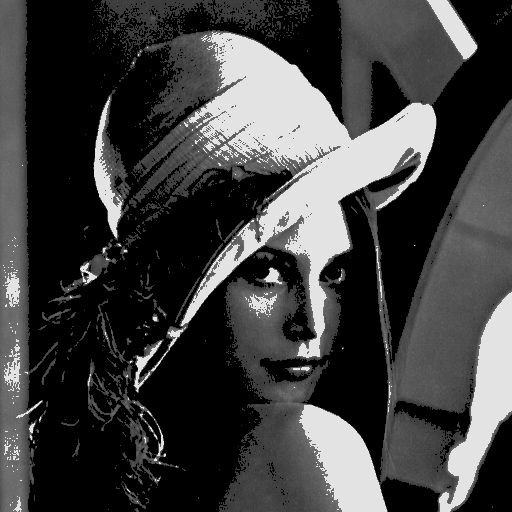

In [7]:
lena_float = np.asarray(lena, dtype=float)/(L-1)
lena_scaled = imadjust(lena_float, 0.25, 0.5, 0, 1)
lena_scaled = lena_scaled*(L-1)
lena_scaled = lena_scaled.astype(np.uint8)
displayImage(Image.fromarray(lena_scaled), w, h)

***
### 2. Dada la imagen del globo ocular *eyebw.jpg*, buscar transformaciones que permitan resaltar las venas lo mejor posible.

***
### 3. Bit Plane Slicing
* Reproducir el ejemplo de la teoría del fractal 8 bit.
* Dada la imagen *onedollar.jpg*, convertirla a niveles de gris y mostrar todos los bit-planes (8 bit). A partir de los bit-planes obtenidos, reconstruir la imagen usando diferentes bit-planes (Experimentar usando los planos 8-7-6-5-1).

***
### 4. Explicar que es un histograma de una imagen. Escribir un código para calcularlo.

***
### 5. Explicar qué diferencia hay entre el brillo y contraste. Mostrar ejemplos.

***
### 6. Escribir un código que modifique el brillo y contraste de una imagen.

***
### 7.  ¿Para qué se usa la ecualización de un histograma? Dar ejemplos.

***
### 8. High Dynamic Range (HDR) Imaging
Investigar que es HDR y aplicarlo a las imágenes *office_x.jpg* (x=1-6).

Tiempos de exposicion : [0.0333, 0.1000, 0.3333, 0.6250, 1.3000, 4.0000]

Leer https://www.learnopencv.com/high-dynamic-range-hdr-imaging-using-opencv-cpp-python/

***
### 9. Realizar la medición de al menos 2 monitores (Laptop-PC) de la corrección gamma usando el fotómetro provisto por la catedra.

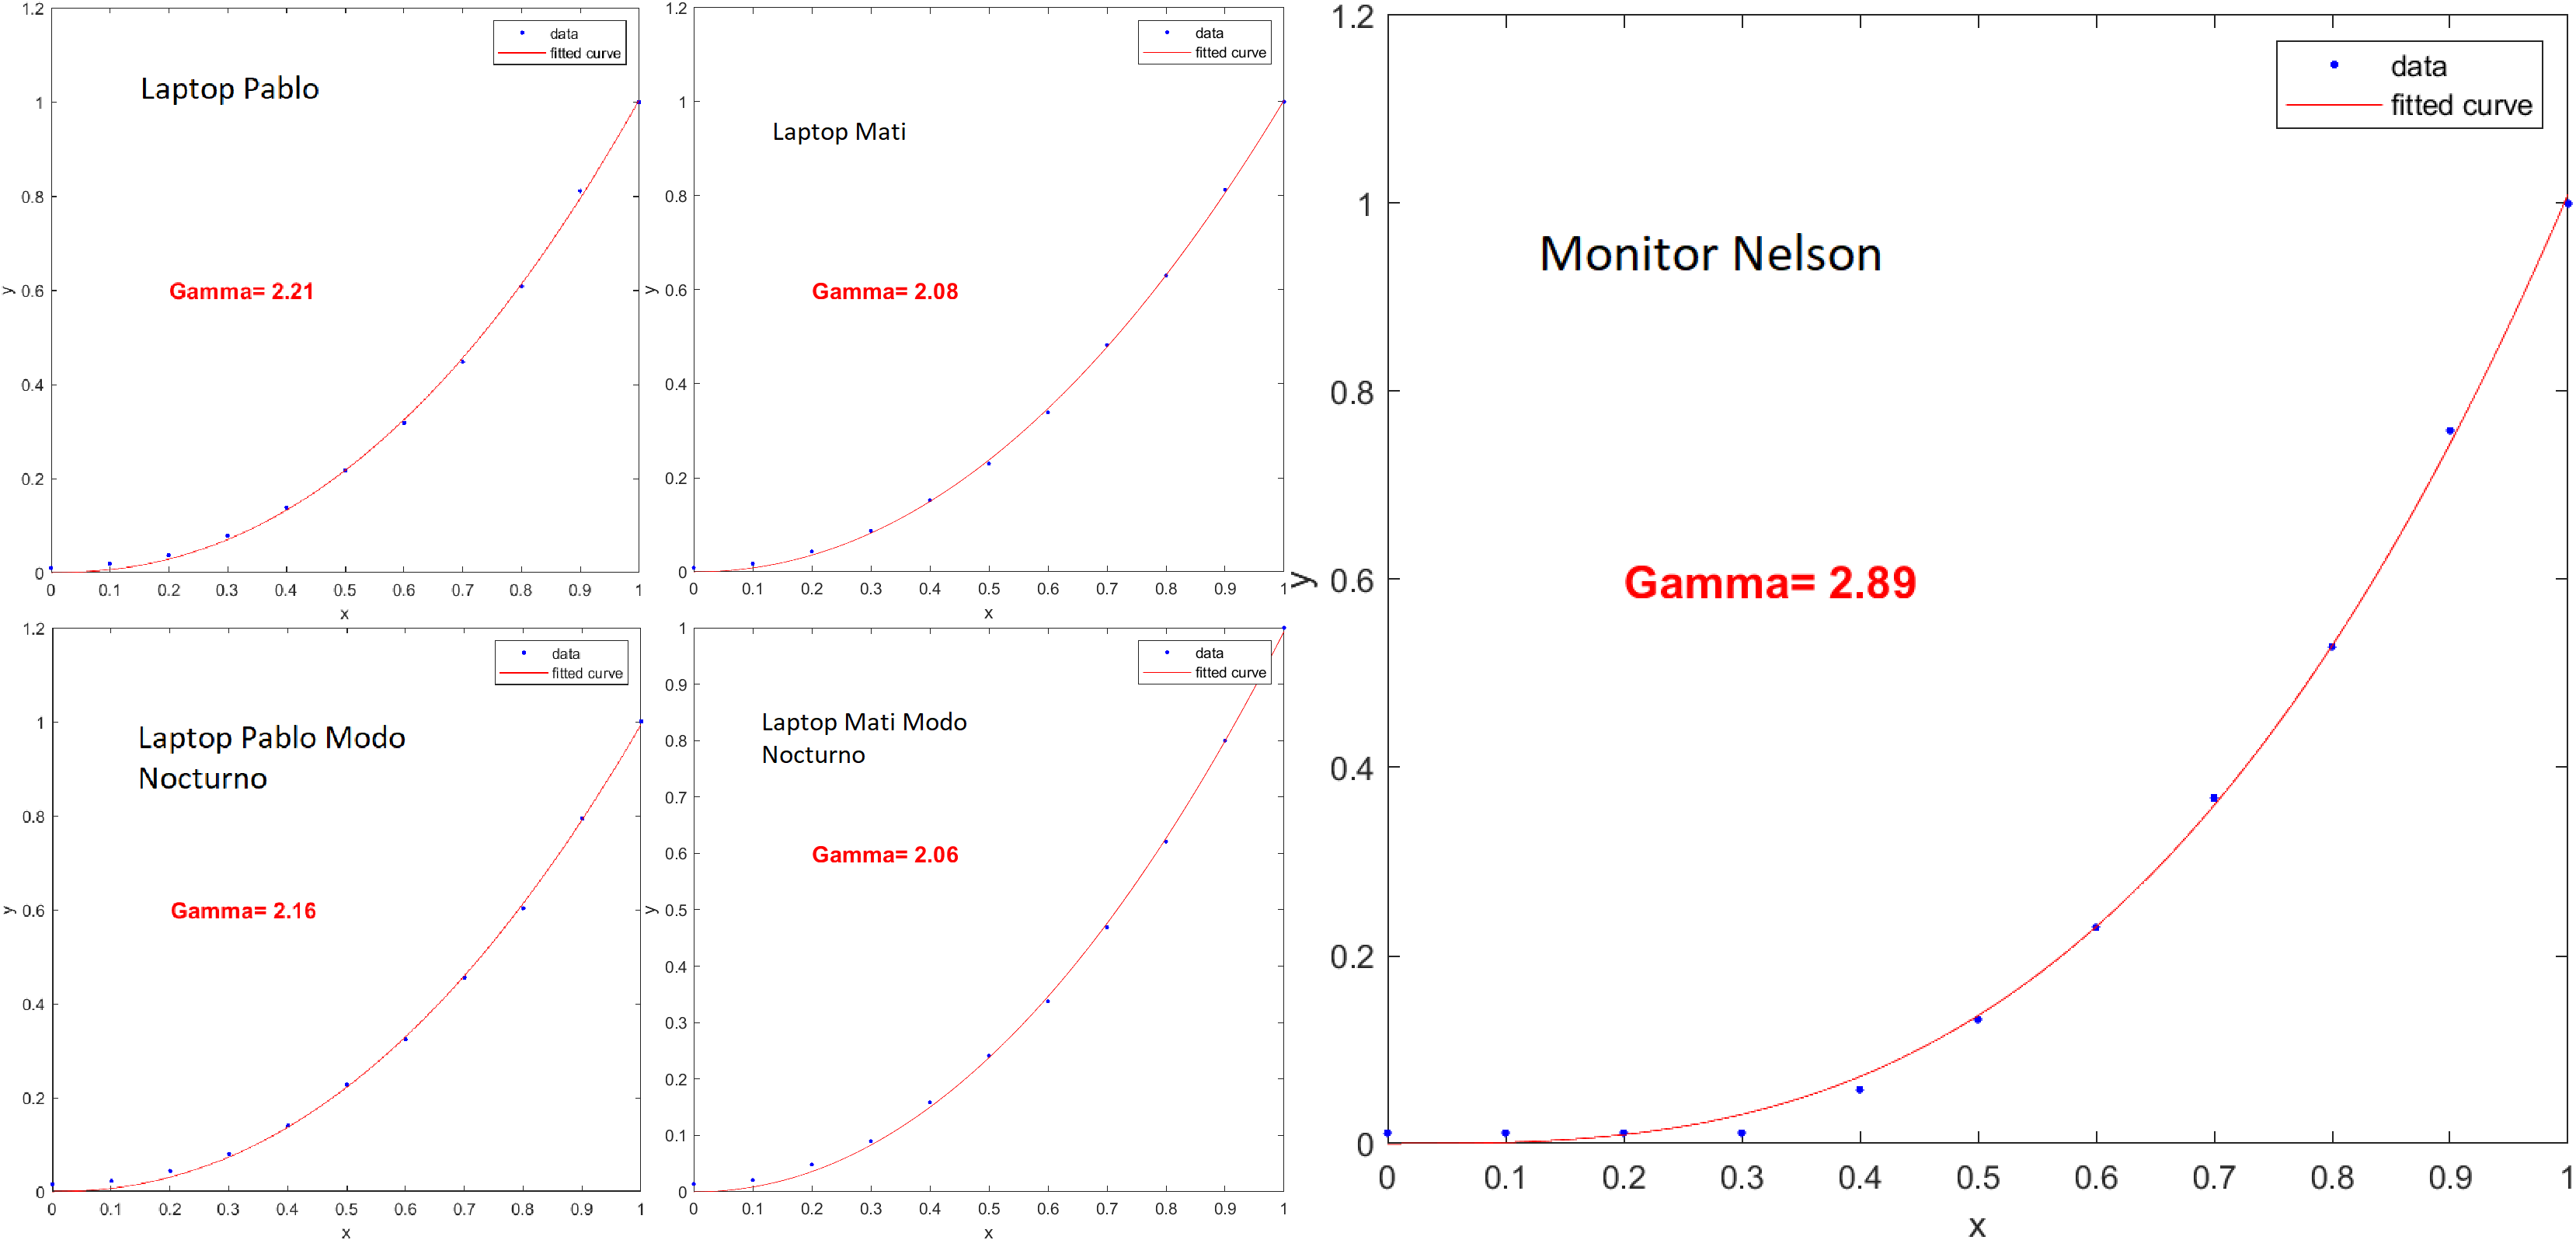

In [8]:
gamma_comparison = build_gamma_comparison()
w,h = gamma_comparison.size
displayImage(gamma_comparison, w, h)